<a href="https://colab.research.google.com/github/hseyeon1006/ESAA_OB/blob/%ED%95%84%EC%82%AC/dacon_text_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#월간 데이콘 소설 작가 분류 AI 경진대회

[대회 링크](https://dacon.io/competitions/official/235670/codeshare/1840?page=undefined&dtype=recent&ptype=undefined)

[참고 링크](https://pypi.org/project/fasttext/#important-preprocessing-data-encoding-conventions)

##1. Facebook의 fasttext를 이용한 text classification

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#drive mount
from google.colab import drive
drive.mount('/content/mydrive')

Drive already mounted at /content/mydrive; to attempt to forcibly remount, call drive.mount("/content/mydrive", force_remount=True).


In [3]:
pip install fasttext

In [4]:
import fasttext

import pandas as pd
import numpy as np

train = pd.read_csv('/content/mydrive/MyDrive/Colab_Notebooks/학회 OB/데이터/소설작가분류_train.csv')

file = open('fasttexttrain.txt','w+')
for i in train.index:
    line = '__label__' + str(train['author'][i])+' '+train['text'][i]
    file.write(line+"\n")

text_clf_model = fasttext.train_supervised('fasttexttrain.txt', epoch=30, minCount=2, maxn=10, verbose=0)
print(text_clf_model.words)
print(text_clf_model.labels)

reuslt = text_clf_model.predict("He was almost choking. There was so much, so much he wanted to say, but strange exclamations were all that came from his lips. The Pole gazed fixedly at him, at the bundle of notes in his hand; looked at odin, and was in evident perplexity.", k=5)
print(reuslt)

test = pd.read_csv('/content/mydrive/MyDrive/Colab_Notebooks/학회 OB/데이터/소설작가분류_test_x.csv')
submission = pd.read_csv('/content/mydrive/MyDrive/Colab_Notebooks/학회 OB/데이터/소설작가분류_sample_submission.csv', index_col=False)

['the', 'and', 'to', 'of', '</s>', 'a', 'I', 'in', 'was', 'that', 'he', 'his', 'you', 'with', 'had', 'it', 'odin', 'for', 'as', 'at', 'not', 'my', 'have', 'is', 'be', 'her', 'said', 'on', 'she', 'but', 'odin,', 'all', 'from', 'me', 'by', 'him', 'were', 'which', 'so', 'this', 'been', 'would', 'The', 'an', 'your', 'are', 'very', 'no', 'He', 'one', 'Mr.', 'could', 'what', 'we', 'they', 'will', 'if', 'or', 'upon', 'there', 'when', 'out', 'do', 'who', 'up', '“I', 'some', 'am', 'odin.', 'more', 'into', 'It', 'their', 'about', 'But', 'only', 'should', 'little', 'must', 'than', 'like', 'any', 'know', 'such', 'did', 'man', 'has', 'see', 'And', 'them', 'can', 'our', 'never', 'much', 'come', 'before', 'She', 'down', 'may', 'think', 'how', 'made', 'it,', 'time', 'me,', 'came', 'now', 'great', 'two', 'good', 'might', 'old', 'You', 'over', 'shall', 'after', 'own', 'cried', 'though', 'him,', 'go', 'it.', 'say', 'without', 'even', 'other', 'you,', 'looked', 'Mrs.', 'then', 'Miss', 'thought', 'every', 

In [5]:
for i in test.index:
    lable, proba = text_clf_model.predict(test['text'][i], k=5)
    for la, pr in zip(lable, proba):
        if '__label__0' == la:
            submission.loc[i, '0'] = pr
        elif '__label__1' == la:
            submission.loc[i, '1'] = pr
        elif '__label__2' == la:
            submission.loc[i, '2'] = pr
        elif '__label__3' == la:
            submission.loc[i, '3'] = pr
        elif '__label__4' == la:
            submission.loc[i, '4'] = pr
    # submission.loc[i, '0'] = proba[lable.loc('__label__0')]
    # submission.loc[i, '1'] = proba[4]
    # submission.loc[i, '2'] = proba[2]
    # submission.loc[i, '3'] = proba[0]
    # submission.loc[i, '4'] = proba[3]

submission.to_csv('result5_fasttext.csv', index=False)
print('end')

end


##2. NLP 전처리

[NLP 전처리](https://dacon.io/competitions/official/235670/codeshare/1823?page=2&dtype=recent)

###1. NLP Preprocessing이란?

NLP : 주로 모델의 입력인 단어, 문장, 문서의 vector를 만들기 전에 진행됨

[일반적인 NLP 전처리 과정]
1. 데이터를 불러온 후 각 신문기사들을 눈으로 확인하며 특수문자, 불용어 그리고 문장 구조에 대한 감을 잡는다
2. 문제의 목적과 분석자의 재량에 따라 불용어를 설정하고 리스트에 저장한다.
3. 불용어 이외의 특수 문자들을 제거한다.
4. 형태소 분석을 통해 문장을 형태소 단위의 토큰으로 분리한다. 이때 내가 설정한 불용어들을 결과로 반환해주는 형태소 분석기를 사용해야 한다.
5. 형태소 단위의 토큰들을 기반으로 저장된 불용어를 제거한다.

###1. 형태소 분석(Stemming)

* 단어나 문장의 언어적 속성을 파악하는 것을 의미한다. 보통 품사의 태깅을 통해 이루어지며 한국어 형태소 분석을 위해 Konlpy 패키지에 있는 다양한 함수를 이용하여 진행할 수 있다.
* 형태소 분석을 하는 이유 : 형태소 단위로 의미있는 단어를 가져가고 싶거나 품사 태깅을 통해 형용사나 명사를 추출하고 싶을 때 많이 이용함

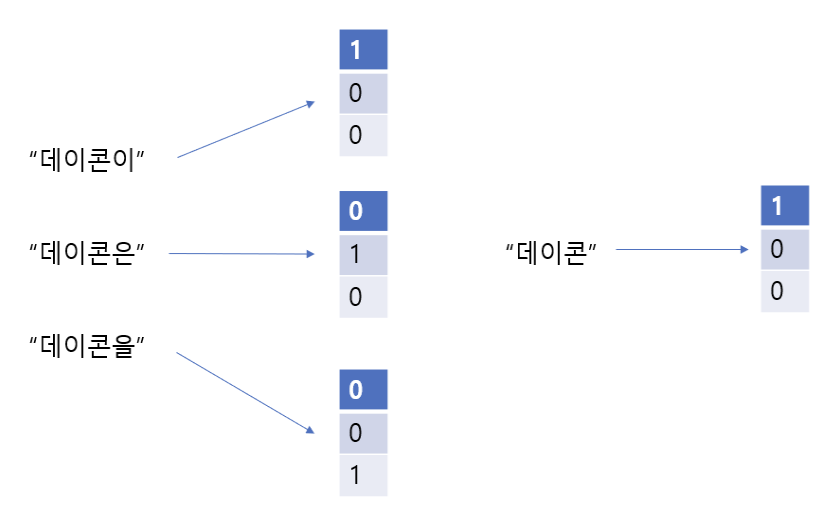

* 문장을 띄어쓰기 단위로 분류하여 vectorization을 하게 되면 '데이콘'이라는 같은 의미의 토큰 세개가 서로 다른 vector를 갖게 된다. 이렇게 되면 모델이 세 단어를 각각 다른 단어로 이해한다. 하지만 형태소 분석을 통해 '데이콘'이라는 단어를 추출한다면 앞의 세 단어는 동일한 vector을 갖게되며 모델이 해당 토큰을 더 잘 학습하는데 도움이 된다.
* 형태소 분석은 모델링보다 성능에 더 중요한 영향을 미치는 아주 중요한 과정이니 다양한 형태소 분석기를 사용하여 결과를 비교하는 것이 좋다.

1-1. Kkma()

In [6]:
pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 37.1 MB/s eta 0:00:00


In [7]:
from konlpy.tag import Kkma
kkma = Kkma()

sentence = '데이콘에서 다양한 컴피티션을 즐기면서 실력있는 데이터 분석가로 성장하세요!!.'

print("형태소 단위로 문장 분리")
print("----------------------")
print(kkma.morphs(sentence))
print(" ")
print("문장에서 명사 추출")
print("----------------------")
print(kkma.nouns(sentence))
print(" ")
print("품사 태킹(PoS)")
print("----------------------")
print(kkma.pos(sentence))

형태소 단위로 문장 분리
----------------------
['데이', '콘', '에서', '다양', '하', 'ㄴ', '컴피티션', '을', '즐기', '면서', '실력', '있', '는', '데이터', '분석가', '로', '성장', '하', '세요', '!!', '.']
 
문장에서 명사 추출
----------------------
['데이', '데이콘', '콘', '다양', '컴피티션', '실력', '데이터', '분석가', '성장']
 
품사 태킹(PoS)
----------------------
[('데이', 'NNG'), ('콘', 'NNG'), ('에서', 'JKM'), ('다양', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('컴피티션', 'UN'), ('을', 'JKO'), ('즐기', 'VV'), ('면서', 'ECE'), ('실력', 'NNG'), ('있', 'VV'), ('는', 'ETD'), ('데이터', 'NNG'), ('분석가', 'NNG'), ('로', 'JKM'), ('성장', 'NNG'), ('하', 'XSV'), ('세요', 'EFN'), ('!!', 'SW'), ('.', 'SF')]


1-2. Okt()

In [8]:
from konlpy.tag import Okt
Okt = Okt()

sentence = '데이콘에서 다양한 컴피티션을 즐기면서 실력있는 데이터 분석가로 성장하세요!!.'

print("형태소 단위로 문장 분리")
print("----------------------")
print(Okt.morphs(sentence))
print(" ")
print("문장에서 명사 추출")
print("----------------------")
print(Okt.nouns(sentence))
print(" ")
print("품사 태킹(PoS)")
print("----------------------")
print(Okt.pos(sentence))

형태소 단위로 문장 분리
----------------------
['데', '이콘', '에서', '다양한', '컴피티션', '을', '즐기면서', '실력', '있는', '데이터', '분석', '가로', '성장하세요', '!!.']
 
문장에서 명사 추출
----------------------
['데', '이콘', '컴피티션', '실력', '데이터', '분석', '가로']
 
품사 태킹(PoS)
----------------------
[('데', 'Noun'), ('이콘', 'Noun'), ('에서', 'Josa'), ('다양한', 'Adjective'), ('컴피티션', 'Noun'), ('을', 'Josa'), ('즐기면서', 'Verb'), ('실력', 'Noun'), ('있는', 'Adjective'), ('데이터', 'Noun'), ('분석', 'Noun'), ('가로', 'Noun'), ('성장하세요', 'Adjective'), ('!!.', 'Punctuation')]


이외에도 Twitter, Komoran, Hannanum 등의 형태소 분석기가 존재한다. 속도와 정확도 측면에서 차이가 있으며 주로 Mecab 분석기를 이용한다.

* Mecab: 굉장히 속도가 빠르면서도 좋은 분석 결과를 보여준다.
* Komoran: 댓글과 같이 정제되지 않은 글에 대해서 먼저 사용해보면 좋다.(오탈자를 어느정도 고려해준다.)
* Kkma: 분석 시간이 오래걸리기 때문에 잘 이용하지 않게 된다.
* Okt: 품사 태깅 결과를 Noun, Verb등 알아보기 쉽게 반환해준다.
* khaiii: 카카오에서 가장 최근에 공개한 분석기, 성능이 좋다고 알려져 있으며 다양한 실험이 필요하다.


1-3. Mecab()

In [ ]:
#from konlpy.tag import Mecab
#Mecab  = Mecab ()

#sentence = '데이콘에서 다양한 컴피티션을 즐기면서 실력있는 데이터 분석가로 성장하세요!!.'

#print("형태소 단위로 문장 분리")
#print("----------------------")
#print(Mecab .morphs(sentence))
#print(" ")
#print("문장에서 명사 추출")
#print("----------------------")
#print(Mecab .nouns(sentence))
#print(" ")
#print("품사 태킹(PoS)")
#print("----------------------")
#print(Mecab .pos(sentence))

###2. 표제어 추출(Lemmatization)

Lemmatization과 stemming은 모두 단어의 본 모습을 찾아주는 과정이다.

In [9]:
#예시
from konlpy.tag import Kkma
kkma = Kkma()

sentence = '성장했었다.'

print("품사 태킹(PoS)")
print("----------------------")
print(kkma.pos(sentence))

품사 태킹(PoS)
----------------------
[('성장', 'NNG'), ('하', 'XSV'), ('었', 'EPT'), ('었', 'EPT'), ('다', 'EFN'), ('.', 'SF')]


In [10]:
sentence = '성장하였었다.'

print("품사 태킹(PoS)")
print("----------------------")
print(kkma.pos(sentence))

품사 태킹(PoS)
----------------------
[('성장', 'NNG'), ('하', 'XSV'), ('였', 'EPT'), ('었', 'EPT'), ('다', 'EFN'), ('.', 'SF')]


###3. 불용어 제거(Stopwords removing)

불용어 : 문장에서 큰 의미가 없다고 생각되는 단어, 글자들

예시 : "이번에 새롭게 개봉한 영화의 배우들은 모두 훌륭한 연기력과 아름다운 목소리를 갖고 있어!!"

예시 문장에서 감성분석을 진행할 때는 "훌륭한"과 "아름다운"등이 주요 특징으로 사용될 것이다. 하지만 경우에 따라서는 이러한 형용사들을 제외한 배우들의 연기력과 목소리라는 정보에 집중해야 할 때가 있다. 이럴때는 "훌륭한"과 "아름다운"은 불용어로 정의될 수 있다.

In [12]:
import re
from konlpy.tag import Okt
tokenizer = Okt()

def text_preprocessing(text,tokenizer):

    stopwords = ['을', '를', '이', '가', '은', '는']

    #1. 영어 소문자와 한글을 제외한 모든 문자를 제거
    txt = re.sub('[^가-힣a-z]', ' ', text)
    #2. Okt를 이용해 형태소 분석
    token = tokenizer.morphs(txt)
    #3. 형태소 분석기를 거쳐 나온 결과들 중 stopwords 리스트에 포함되지 않는 토큰만 token이라는 리스트에 반환
    token = [t for t in token if t not in stopwords]

    return token

ex_text = "이번에 새롭게 개봉한 영화의 배우들은 모두 훌륭한 연기력과 아름다운 목소리를 갖고 있어!!"
example_pre= text_preprocessing(ex_text,tokenizer)

In [13]:
#결과
print(example_pre)

['이번', '에', '새롭게', '개봉', '한', '영화', '의', '배우', '들', '모두', '훌륭한', '연기력', '과', '아름다운', '목소리', '갖고', '있어']


###4. 대회 적용

In [15]:
def text_preprocessing(text_list):

    stopwords = ['을', '를', '이', '가', '은', '는', 'null'] #불용어 설정
    tokenizer = Okt() #형태소 분석기
    token_list = []

    for text in text_list:
        txt = re.sub('[^가-힣a-z]', ' ', text) #한글과 영어 소문자만 남기고 다른 글자 모두 제거
        token = tokenizer.morphs(txt) #형태소 분석
        token = [t for t in token if t not in stopwords or type(t) != float] #형태소 분석 결과 중 stopwords에 해당하지 않는 것만 추출
        token_list.append(token)

    return token_list, tokenizer

#형태소 분석기를 따로 저장한 이유는 후에 test 데이터 전처리를 진행할 때 이용해야 되기 때문입니다.
#train['new_article'], okt = text_preprocessing(train['content'])

##3. Vectorization

[Vectorization](https://dacon.io/competitions/official/235670/codeshare/1841?page=2&dtype=recent)

##Vectorization 이란?

* NLP를 컴퓨터가 이해할 수 있게 수치로 바꾸는 것을 말한다. 이 때 벡터로 변환된 고유의 토큰들이 모인 집합을 vocabulary 라고 하며 vocabulary가 크면 클수록 학습이 오래 걸린다.

예시 문장 : 자연어 처리는 정말 즐거워. 즐거운 자연어 처리 다같이 해보자

In [16]:
#예시 문장을 간단한 전처리와 okt를 활용하여 나누기
from konlpy.tag import Okt
import re

Okt = Okt()

sentences = ['자연어 처리는 정말 정말 즐거워.', '즐거운 자연어 처리 다같이 해보자.']
tokens = []

for sentence in sentences:
    sentence = re.sub('[^가-힣a-z]', ' ', sentence) #간단한 전처리
    token = (Okt.morphs(sentence)) #형태소 분석기를 이용햔 토큰 나누기
    tokens.append(' '.join(token))

print("형태소 단위로 문장 분리")
print("----------------------")
print(tokens)

형태소 단위로 문장 분리
----------------------
['자연어 처리 는 정말 정말 즐거워', '즐거운 자연어 처리 다 같이 해보자']


###1. One Hot Encoding

* 해당 단어가 존재하면 1, 그렇지 않으면 0으로 표시되는 기법
* keras를 이용하면 쉽게 구현 가능함
* texts_to_sequences를 활용해 각 토큰에 고유한 정수를 부여한 후 to_categorical을 활용하면 간단하게 구현이 가능함

In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

t = Tokenizer()
t.fit_on_texts(tokens)
print("각 토큰에게 고유의 정수 부여")
print("----------------------")
print(t.word_index)
print(" ")

s1=t.texts_to_sequences(tokens)[0]
print("부여된 정수로 표시된 문장1")
print("----------------------")
print(s1)
print(" ")

s2=t.texts_to_sequences(tokens)[1]
print("부여된 정수로 표시된 문장2")
print("----------------------")
print(s2)
print(" ")

s1_one_hot = to_categorical(s1)
print("문장1의 one-hot-encoding")
print("----------------------")
print(s1_one_hot)
print(" ")

s2_one_hot = to_categorical(s2)
print("문장2의 one-hot-encoding")
print("----------------------")
print(s2_one_hot)

각 토큰에게 고유의 정수 부여
----------------------
{'자연어': 1, '처리': 2, '정말': 3, '는': 4, '즐거워': 5, '즐거운': 6, '다': 7, '같이': 8, '해보자': 9}
 
부여된 정수로 표시된 문장1
----------------------
[1, 2, 4, 3, 3, 5]
 
부여된 정수로 표시된 문장2
----------------------
[6, 1, 2, 7, 8, 9]
 
문장1의 one-hot-encoding
----------------------
[[0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]
 
문장2의 one-hot-encoding
----------------------
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


이 방식은 vocabulary 크기가 커짐에 따라 많은 공간을 차지하게 되고 벡터가 굉장히 sparse해지기 때문에 모델에게 좋은 특성을 알려주지 못하는 경우가 대부분임

###2. Count Vectorization

vocabulary를 활용하여 각 문장이 갖고 있는 토큰의 count를 기반으로 문장을 vectorization 해줌

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform(tokens) # 여러 개의 문장을 넣어줘야 잘 작동

print(vectorizer.get_feature_names_out())
print(vectors.toarray())

['같이' '자연어' '정말' '즐거운' '즐거워' '처리' '해보자']
[[0 1 2 0 1 1 0]
 [1 1 0 1 0 1 1]]


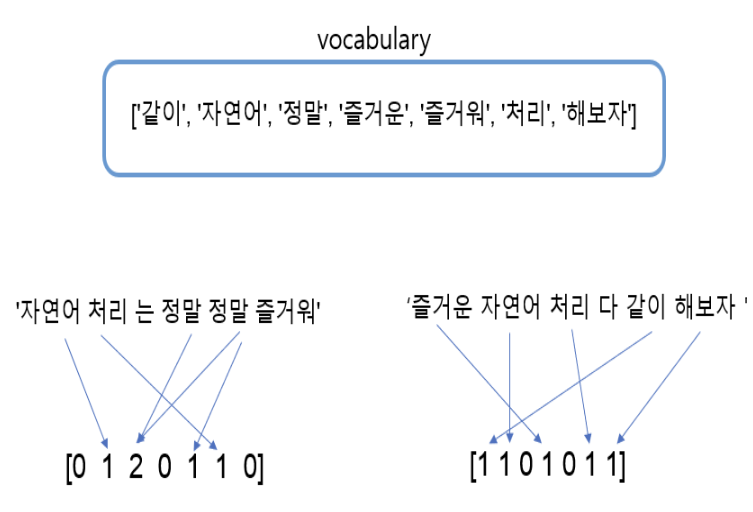

* 벡터화 결과 각 문장은 vocabulary의 인덱스를 기준으로 카운트가 정수로 표시된 것을 알 수 있다.
* 아쉬운 점 : sklearn의 CountVectorizer는 한 글자는 자동으로 제거해준다.
* 형태소 분석기의 중요성에 대해서 알 수 있다. 즐거운과 즐거워는 같은 의미를 갖는 토큰이지만 okt는 이를 구분해주지 못해서 다른 토큰으로 분리되었다. 이는 모델에서 같은 의미의 토큰을 다르게 학습할 수 있음을 의미한다.

###3. Tfldf

[핵심]
1. 단어가 몇 번 등장했는지에 대한 정보
2. 어떤 단어가 언급된 문서의 수가 적다면 그 단어는 문서를 분류하는데에 있어서 중요한 단어

-> 등장 횟수도 많고 문서 분별력이 있는 단어들을 점수화하여 벡터화한 기법

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(min_df=0)
tfidf_vectorizer = tfidf.fit_transform(tokens)

tfidf_dict = tfidf.get_feature_names_out()
print(tfidf_dict)
print(tfidf_vectorizer.toarray())

['같이' '자연어' '정말' '즐거운' '즐거워' '처리' '해보자']
[[0.         0.29017021 0.81564821 0.         0.4078241  0.29017021
  0.        ]
 [0.49922133 0.35520009 0.         0.49922133 0.         0.35520009
  0.49922133]]


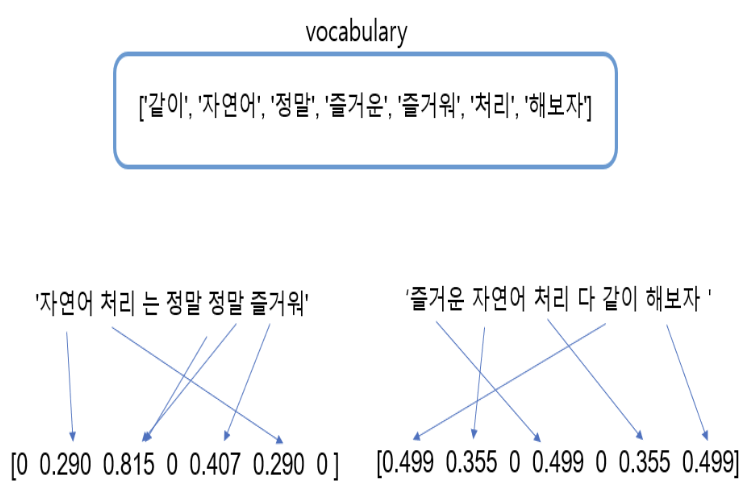

Count Vectorization과 동일한 방법이지만 단어들에 대한 가중치가 다르게 표시됨

[Tfldf 참고](https://donghwa-kim.github.io/TFIDF.html)

###4.  Padding

* 가변 길이의 입력을 받는 모형들이 존재하지만 기본적으로는 문장의 길이를 동일하게 맞춰주어야 한다. 문장의 길이를 맞춰주기 위해 부족한 길이만큼 0을 채워넣게 되는데 이를 Padding이라고 한다.

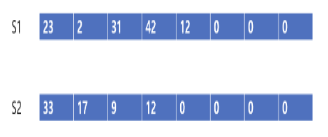

* 문장 S1의 길이와 S2의 길이가 서로 다를 때 뒤쪽에 0을 Padding해주어 같은 길이로 맞춰줌

###5. 대회 적용

vectorization 기법을 사용하지 않고 keras의 texts_to_sequences를 통한 정수화만 진행해 주어도 높은 정확도를 얻을 수 있음

In [22]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def text2sequence(train_text, max_len=100):

    tokenizer = Tokenizer() #keras의 vectorizing 함수 호출
    tokenizer.fit_on_texts(train_text) #train 문장에 fit
    train_X_seq = tokenizer.texts_to_sequences(train_text) #각 토큰들에 정수 부여
    vocab_size = len(tokenizer.word_index) + 1 #모델에 알려줄 vocabulary의 크기 계산
    print('vocab_size : ', vocab_size)
    X_train = pad_sequences(train_X_seq, maxlen = max_len) #설정한 문장의 최대 길이만큼 padding

    return X_train, vocab_size, tokenizer

train_X, vocab_size, vectorizer = text2sequence(train['text'], max_len = 100)

vocab_size :  42331
